# Introduction 
the dataset from kaggle from this link https://www.kaggle.com/datasets/raghupalem/bill_authentication/code

# Import Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Load the Data

In [4]:
df = pd.read_csv("bill_authentication.csv")

In [5]:
df.head()


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Exploration

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [22]:
df.dtypes


Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [23]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [24]:
df.nunique()


Variance    1338
Skewness    1256
Curtosis    1270
Entropy     1156
Class          2
dtype: int64

In [25]:
df.shape


(1372, 5)

In [26]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [6]:
df.describe()


,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Visualize  Data

<Axes: xlabel='Variance'>

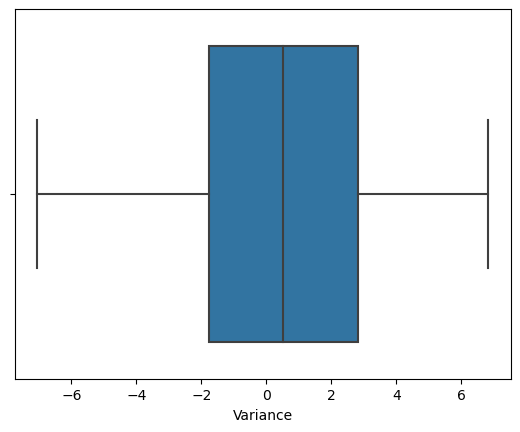

In [30]:
sns.boxplot(x='Variance',data=df)


<Axes: xlabel='Skewness'>

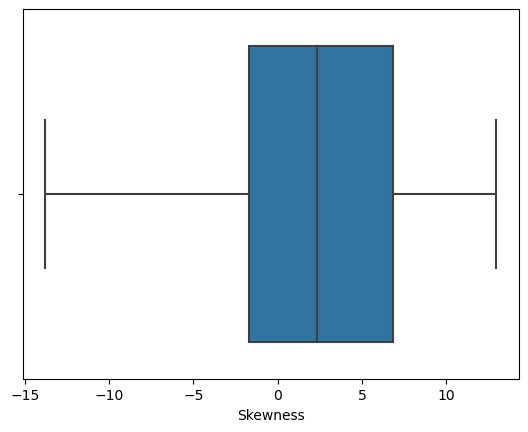

In [28]:
 sns.boxplot(x='Skewness',data=df)

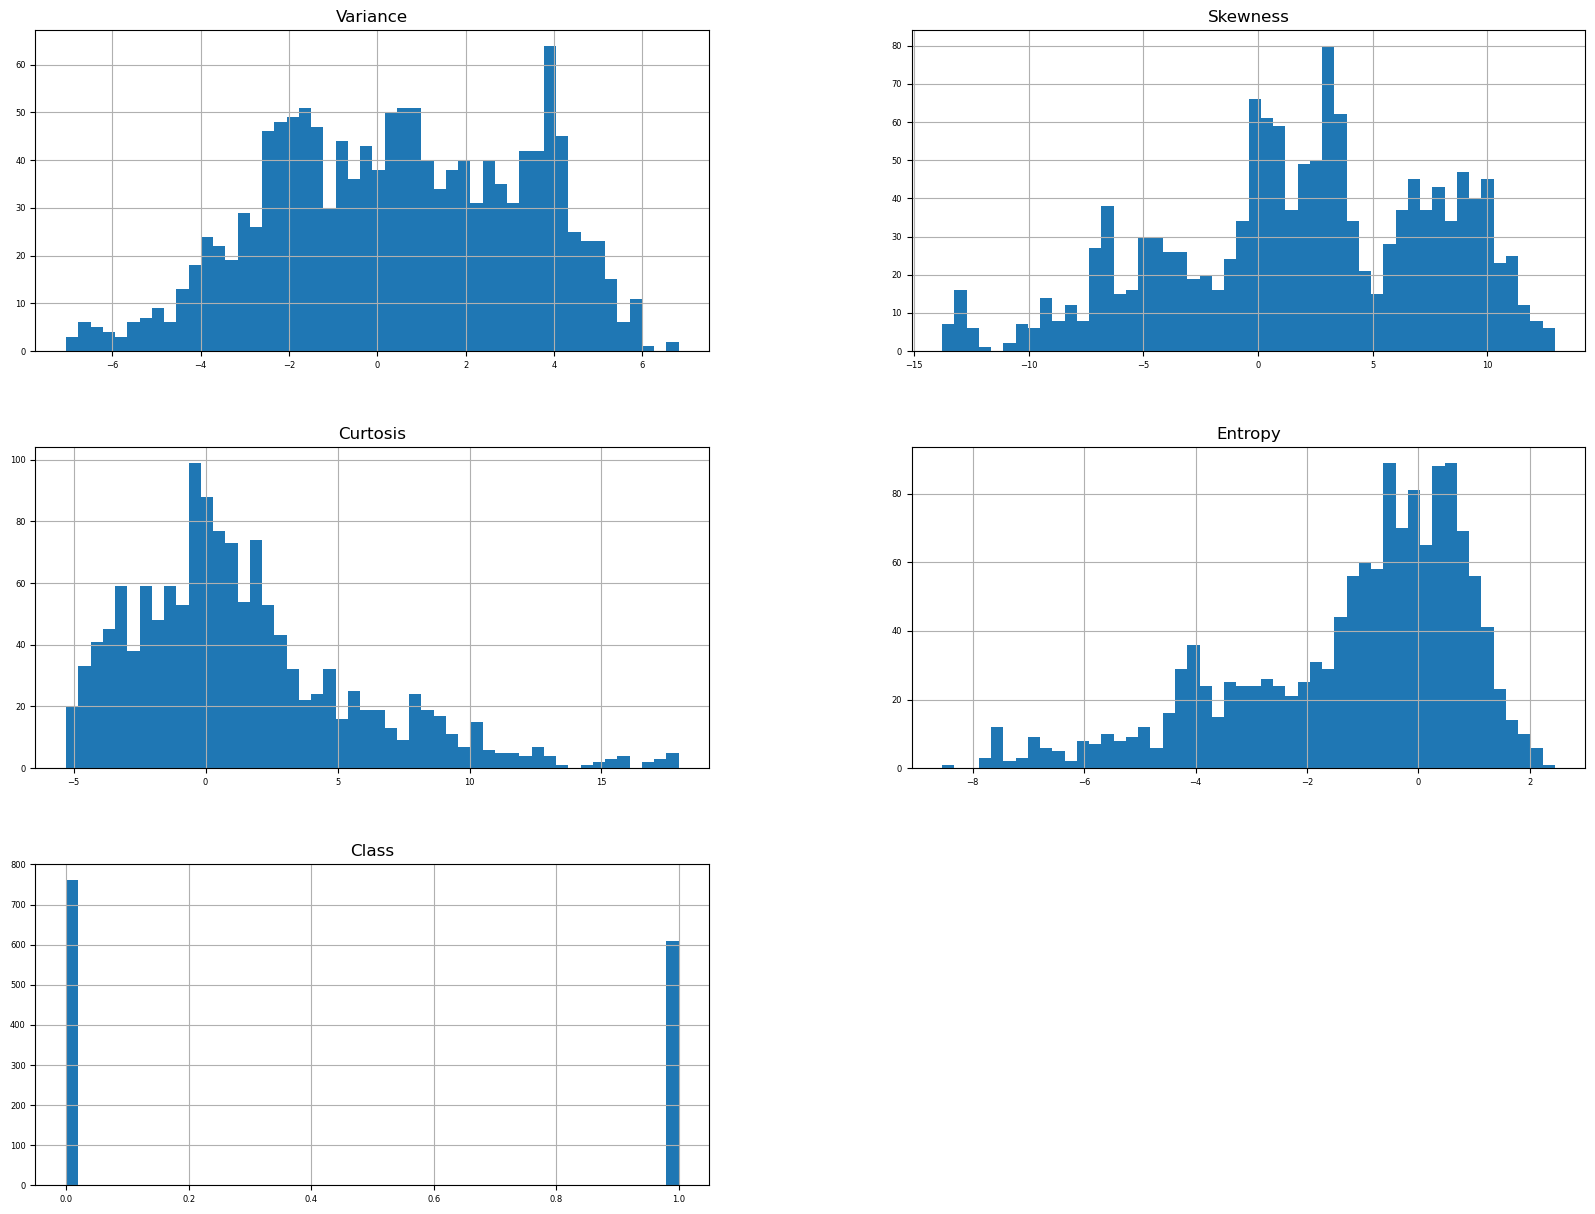

In [9]:
df.hist(bins=50, figsize=(20,15),xlabelsize=6,ylabelsize=6)
plt.show()

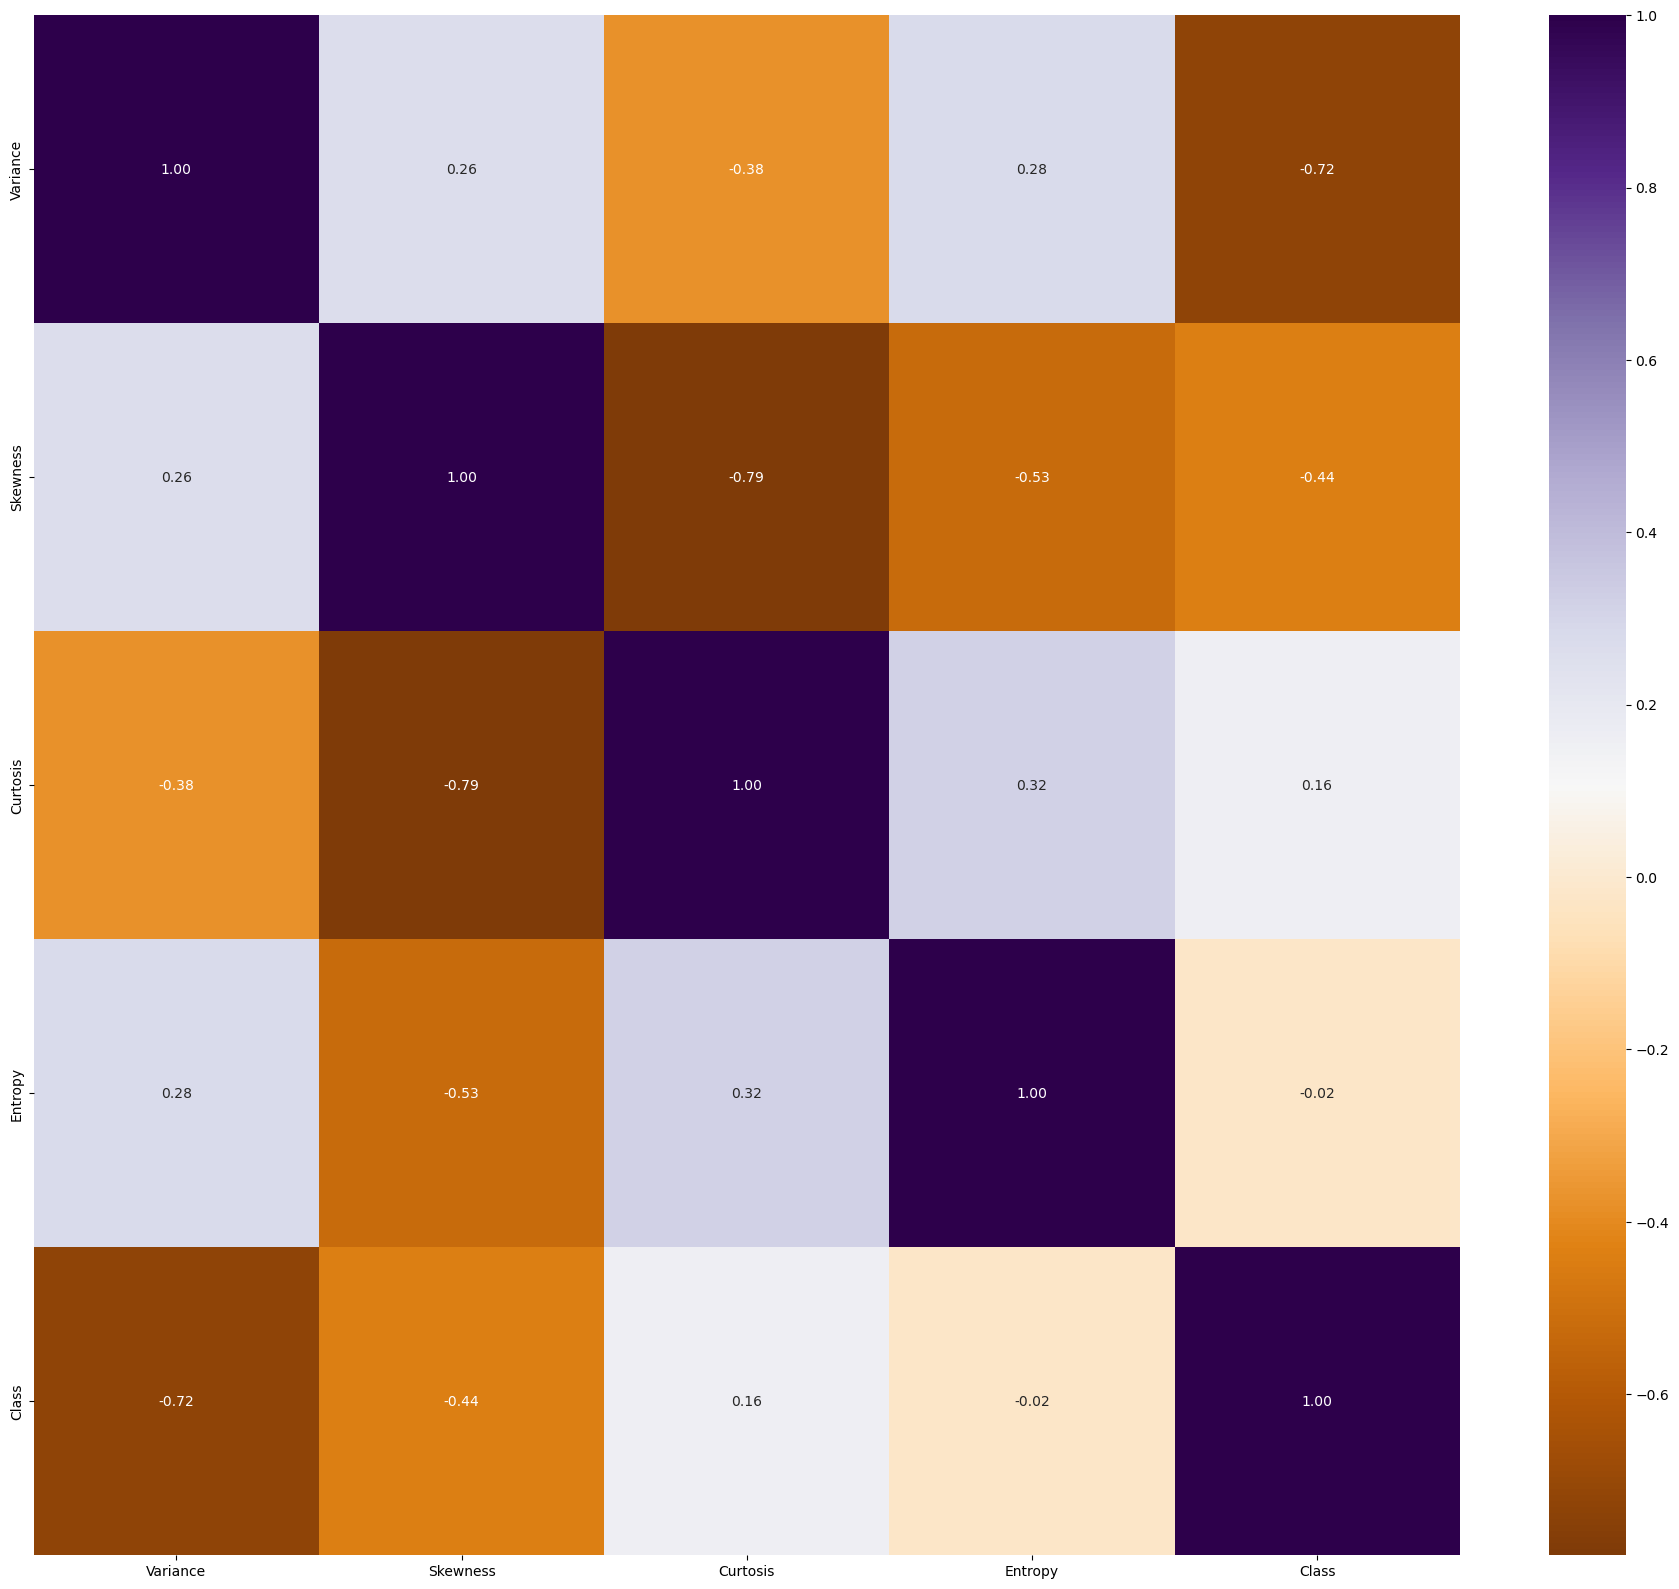

In [10]:
#Heat Map Representation
d = df.copy()
plt.figure(figsize=(23,20))
sns.heatmap(data = d.corr(),annot = True,cmap="PuOr",fmt=".2f")
plt.show()

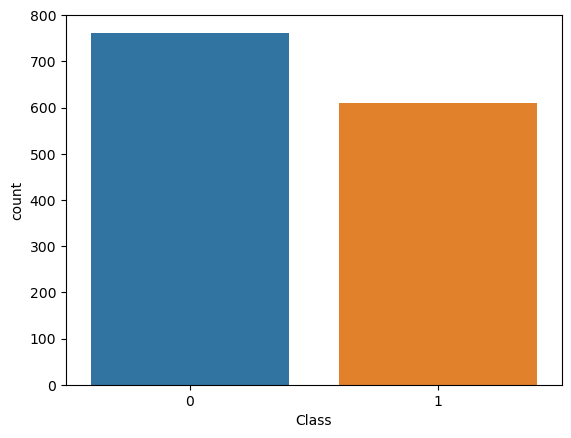

In [19]:
# Countplot of the class
sns.countplot(x='Class',data=df)
plt.show()

# Splitting the Data


In [12]:
#بنقسم الداتا ل x,y
x = df.drop('Class',axis=1)
y = df['Class']
print(x.head())
print(y.head())

   Variance  Skewness  Curtosis  Entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [13]:
#بنقسم الداتا الي بيانات تريننج 80% و20% تيست
dt = DecisionTreeClassifier()
x1,x2,y1,y2 = train_test_split(x,y,test_size=0.2,random_state=0)
dt.fit(x1,y1)
pred = dt.predict(x2)

[Text(0.4906716417910448, 0.9375, 'x[0] <= 0.274\ngini = 0.495\nsamples = 1097\nvalue = [605, 492]'),
 Text(0.3208955223880597, 0.8125, 'x[1] <= 7.565\ngini = 0.294\nsamples = 524\nvalue = [94, 430]'),
 Text(0.22388059701492538, 0.6875, 'x[0] <= -0.459\ngini = 0.123\nsamples = 441\nvalue = [29, 412]'),
 Text(0.11940298507462686, 0.5625, 'x[2] <= 6.746\ngini = 0.058\nsamples = 369\nvalue = [11, 358]'),
 Text(0.05970149253731343, 0.4375, 'x[1] <= 7.293\ngini = 0.007\nsamples = 266\nvalue = [1, 265]'),
 Text(0.029850746268656716, 0.3125, 'gini = 0.0\nsamples = 262\nvalue = [0, 262]'),
 Text(0.08955223880597014, 0.3125, 'x[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05970149253731343, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11940298507462686, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1791044776119403, 0.4375, 'x[1] <= -4.8\ngini = 0.175\nsamples = 103\nvalue = [10, 93]'),
 Text(0.14925373134328357, 0.3125, 'gini = 0.0\nsamples = 

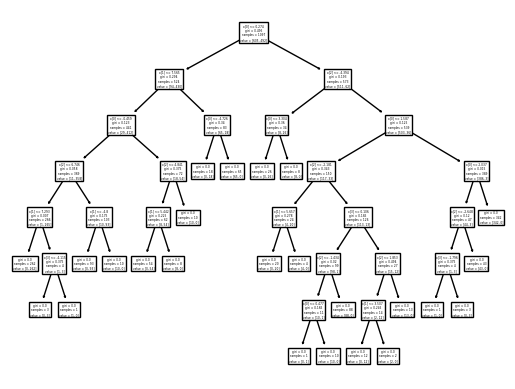

In [14]:
#plotting the Decision Treeرسم الديكسجن تري
plot_tree(dt)

In [15]:
#Accuracy Prediction 
acc = accuracy_score(y2,pred)
print(f"The Accuracy is {acc}")

The Accuracy is 0.9927272727272727


In [16]:
#Confusion matrix and Classification Report حساب مصفوفه الخطا وتقرير الصنف
print(confusion_matrix(y2,pred))
print(classification_report(y2,pred))

[[155   2]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

